<a href="https://colab.research.google.com/github/dsskonuru/ga-satellite-constellation-optimization/blob/master/GA_Satellite_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
N = 12  # of satellites
k = 4  # of subconstellations
subconstellation_size = N // k  # satellites per subconstellation

>$\text{Ising:} \qquad  E(\bf{s}|\bf{h},\bf{J})
= \left\{ \sum_{i=1}^N h_i s_i + \sum_{i<j}^N J_{i,j} s_i s_j  \right\}$

>$\small E \quad {\longrightarrow} \quad Objective \; function \; (to \; be \; minimized) 
\\ \small s_i \quad {\longrightarrow} \quad Constellation 
\\ \small h_i \quad {\longrightarrow} \quad Coverage \; of \; the \; constellation
\\ \small J_{i,j} \quad {\longrightarrow} \quad Penality \; for \; pairs \; having \; a \; satellite \; in \; common$

In [24]:
import numpy as np

coverage = {}
for i in range(N):
  coverage[i] = np.random.randint(0, 100)/100
print(coverage)

score_threshold = 0.4

{0: 0.23, 1: 0.73, 2: 0.38, 3: 0.68, 4: 0.36, 5: 0.62, 6: 0.08, 7: 0.99, 8: 0.82, 9: 0.1, 10: 0.16, 11: 0.0}


In [25]:
import itertools

subconstellations = {} # create dict of subconstellations and its coverage

for subconstellation in itertools.combinations(range(N), N//k):
    score = sum(coverage[v] for v in subconstellation) / subconstellation_size

    if score < score_threshold:
        continue

    subconstellations[frozenset(subconstellation)] = score

print(subconstellations)    
print(len(subconstellations))

{frozenset({0, 1, 2}): 0.4466666666666666, frozenset({0, 1, 3}): 0.5466666666666667, frozenset({0, 1, 4}): 0.43999999999999995, frozenset({0, 1, 5}): 0.5266666666666667, frozenset({0, 1, 7}): 0.65, frozenset({0, 1, 8}): 0.5933333333333333, frozenset({0, 2, 3}): 0.43, frozenset({0, 2, 5}): 0.41, frozenset({0, 2, 7}): 0.5333333333333333, frozenset({0, 8, 2}): 0.4766666666666666, frozenset({0, 3, 4}): 0.42333333333333334, frozenset({0, 3, 5}): 0.51, frozenset({0, 3, 7}): 0.6333333333333333, frozenset({0, 8, 3}): 0.5766666666666667, frozenset({0, 4, 5}): 0.4033333333333333, frozenset({0, 4, 7}): 0.5266666666666667, frozenset({0, 8, 4}): 0.47, frozenset({0, 5, 7}): 0.6133333333333333, frozenset({0, 8, 5}): 0.5566666666666666, frozenset({0, 6, 7}): 0.43333333333333335, frozenset({0, 8, 7}): 0.68, frozenset({0, 9, 7}): 0.44, frozenset({0, 10, 7}): 0.45999999999999996, frozenset({0, 11, 7}): 0.4066666666666667, frozenset({0, 8, 10}): 0.4033333333333333, frozenset({1, 2, 3}): 0.5966666666666667

In [0]:
def init_pop(sol_per_pop):
  population = []
  for i in range(sol_per_pop):
    constellation = [np.random.choice(list(subconstellations.keys())) for j in range(k)]
    population.append(constellation)
  return population


In [27]:
sol_per_pop = 10

new_population = init_pop(sol_per_pop)

print(new_population)
print(len(new_population))

[[frozenset({8, 2, 5}), frozenset({2, 4, 5}), frozenset({1, 2, 4}), frozenset({11, 5, 7})], [frozenset({8, 2, 6}), frozenset({8, 1, 3}), frozenset({0, 1, 5}), frozenset({8, 11, 7})], [frozenset({8, 3, 4}), frozenset({8, 1, 10}), frozenset({11, 5, 7}), frozenset({8, 1, 5})], [frozenset({8, 4, 6}), frozenset({9, 4, 7}), frozenset({1, 4, 7}), frozenset({8, 1, 11})], [frozenset({0, 8, 2}), frozenset({8, 1, 4}), frozenset({0, 3, 5}), frozenset({2, 3, 4})], [frozenset({0, 3, 7}), frozenset({10, 3, 7}), frozenset({3, 5, 6}), frozenset({0, 1, 4})], [frozenset({3, 5, 7}), frozenset({3, 4, 7}), frozenset({9, 5, 7}), frozenset({10, 5, 7})], [frozenset({8, 10, 4}), frozenset({0, 8, 4}), frozenset({0, 3, 7}), frozenset({0, 1, 2})], [frozenset({10, 6, 7}), frozenset({8, 1, 6}), frozenset({2, 10, 7}), frozenset({0, 8, 2})], [frozenset({8, 1, 10}), frozenset({11, 4, 7}), frozenset({0, 3, 7}), frozenset({1, 5, 7})]]
10


In [0]:
def cal_fitness(population):
  fitness = []

  for con in population:
    coverage = sum([subconstellations[subcon] for subcon in con])

    # penalty multiple subcons sharing the same satellite
    for a, b in itertools.combinations(con, 2): 
      if not a.isdisjoint(b):
        coverage-=1

    fitness.append(coverage)
      
  return fitness

In [29]:
fitness = cal_fitness(new_population)
print(fitness)

[-2.9133333333333336, -1.6999999999999997, -1.5500000000000003, -2.8866666666666667, -2.9033333333333333, -1.856666666666667, -3.4000000000000004, -2.003333333333334, -2.06, -1.5666666666666669]


In [0]:
def select_mating_pool(population, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = []
    for parent_num in range(num_parents):
        max_fitness_idx = fitness.index(max(fitness))
        parents.append(population[max_fitness_idx])
        fitness[max_fitness_idx] = -999
    return parents

In [31]:
num_parents_mating = sol_per_pop // 2
parents = select_mating_pool(new_population, fitness, num_parents_mating)

print(parents)
len(parents)

[[frozenset({8, 3, 4}), frozenset({8, 1, 10}), frozenset({11, 5, 7}), frozenset({8, 1, 5})], [frozenset({8, 1, 10}), frozenset({11, 4, 7}), frozenset({0, 3, 7}), frozenset({1, 5, 7})], [frozenset({8, 2, 6}), frozenset({8, 1, 3}), frozenset({0, 1, 5}), frozenset({8, 11, 7})], [frozenset({0, 3, 7}), frozenset({10, 3, 7}), frozenset({3, 5, 6}), frozenset({0, 1, 4})], [frozenset({8, 10, 4}), frozenset({0, 8, 4}), frozenset({0, 3, 7}), frozenset({0, 1, 2})]]


5

In [0]:
def crossover(parents, offspring_size):
    offsprings = []
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = np.random.randint(k)

    for i in range(offspring_size):
        # Index of the first parent to mate.
        parent1_idx = i%len(parents)
        # Index of the second parent to mate.
        parent2_idx = (i+1)%len(parents)
        offspring = parents[parent1_idx][:crossover_point]+parents[parent2_idx][crossover_point:]
        offsprings.append(offspring)

    return offsprings

In [33]:
offspring_crossover = crossover(parents, offspring_size=sol_per_pop-len(parents))

print(offspring_crossover)
len(offspring_crossover)

[[frozenset({8, 3, 4}), frozenset({8, 1, 10}), frozenset({0, 3, 7}), frozenset({1, 5, 7})], [frozenset({8, 1, 10}), frozenset({11, 4, 7}), frozenset({0, 1, 5}), frozenset({8, 11, 7})], [frozenset({8, 2, 6}), frozenset({8, 1, 3}), frozenset({3, 5, 6}), frozenset({0, 1, 4})], [frozenset({0, 3, 7}), frozenset({10, 3, 7}), frozenset({0, 3, 7}), frozenset({0, 1, 2})], [frozenset({8, 10, 4}), frozenset({0, 8, 4}), frozenset({11, 5, 7}), frozenset({8, 1, 5})]]


5

In [0]:
def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(len(offspring_crossover)):
        # The random value to be added to the gene.
        random_idx = np.random.randint(N*k)
        random_value = np.random.choice(list(subconstellations.keys()))
        offspring_crossover[idx] = offspring_crossover[idx][:random_idx] + [random_value] + offspring_crossover[idx][random_idx+1:]
    return offspring_crossover

In [35]:
offspring_mutation = mutation(offspring_crossover)

print(offspring_mutation)
print(len(offspring_mutation))

[[frozenset({8, 3, 4}), frozenset({8, 1, 10}), frozenset({0, 3, 7}), frozenset({1, 5, 7}), frozenset({2, 3, 5})], [frozenset({8, 1, 10}), frozenset({11, 4, 7}), frozenset({0, 1, 5}), frozenset({8, 11, 7}), frozenset({8, 10, 3})], [frozenset({8, 2, 6}), frozenset({8, 1, 3}), frozenset({3, 5, 6}), frozenset({0, 1, 4}), frozenset({8, 1, 4})], [frozenset({0, 3, 7}), frozenset({10, 3, 7}), frozenset({0, 3, 7}), frozenset({0, 1, 2}), frozenset({0, 3, 4})], [frozenset({8, 10, 4}), frozenset({0, 8, 4}), frozenset({11, 5, 7}), frozenset({8, 1, 5}), frozenset({2, 4, 7})]]
5


In [36]:
new_population = parents + offspring_mutation

print(new_population)
len(new_population)

[[frozenset({8, 3, 4}), frozenset({8, 1, 10}), frozenset({11, 5, 7}), frozenset({8, 1, 5})], [frozenset({8, 1, 10}), frozenset({11, 4, 7}), frozenset({0, 3, 7}), frozenset({1, 5, 7})], [frozenset({8, 2, 6}), frozenset({8, 1, 3}), frozenset({0, 1, 5}), frozenset({8, 11, 7})], [frozenset({0, 3, 7}), frozenset({10, 3, 7}), frozenset({3, 5, 6}), frozenset({0, 1, 4})], [frozenset({8, 10, 4}), frozenset({0, 8, 4}), frozenset({0, 3, 7}), frozenset({0, 1, 2})], [frozenset({8, 3, 4}), frozenset({8, 1, 10}), frozenset({0, 3, 7}), frozenset({1, 5, 7}), frozenset({2, 3, 5})], [frozenset({8, 1, 10}), frozenset({11, 4, 7}), frozenset({0, 1, 5}), frozenset({8, 11, 7}), frozenset({8, 10, 3})], [frozenset({8, 2, 6}), frozenset({8, 1, 3}), frozenset({3, 5, 6}), frozenset({0, 1, 4}), frozenset({8, 1, 4})], [frozenset({0, 3, 7}), frozenset({10, 3, 7}), frozenset({0, 3, 7}), frozenset({0, 1, 2}), frozenset({0, 3, 4})], [frozenset({8, 10, 4}), frozenset({0, 8, 4}), frozenset({11, 5, 7}), frozenset({8, 1, 5}

10

In [0]:
sol_per_pop = 25
num_generations = 25000

fitness_g = []
new_population = init_pop(sol_per_pop)

for generation in range(num_generations):
    
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_fitness(new_population)

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=sol_per_pop-len(parents))

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)

    # Creating the new population based on the parents and offspring.
    new_population = parents + offspring_mutation

    fitness_g.append(max(fitness))

# Getting the best solution after iterating finishing all generations.
fitness = cal_fitness(new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))[0][0]

In [38]:
print(max(fitness))
print(new_population[best_match_idx])

1.2466666666666661
[frozenset({1, 3, 4}), frozenset({0, 8, 5}), frozenset({1, 3, 4}), frozenset({2, 10, 7})]


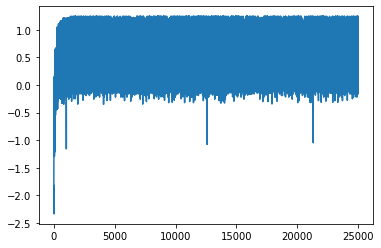

In [39]:
import matplotlib.pyplot as plt

plt.plot(fitness_g)